In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("datanet.csv")

In [2]:
df.head()

,Continent,Sub-Continent,Country,Percentage distribution of women aged 15-49 (per country),Pregnancy intention,Contraceptive availability,Contraceptive method
0,Africa,Eastern Africa,Burundi,0.650838,Not wanting to avoid pregancy,Not applicable,Not applicable
1,Africa,Eastern Africa,Burundi,0.113709,Wanting to avoid pregnancy,Met need,Using modern methods
2,Africa,Eastern Africa,Burundi,0.024347,Wanting to avoid pregnancy,Unmet need,Using traditional methods
3,Africa,Eastern Africa,Burundi,0.211106,Wanting to avoid pregnancy,Unmet need,Using no method
4,Africa,Eastern Africa,Comoros,0.666126,Not wanting to avoid pregancy,Not applicable,Not applicable


In [3]:
df.columns

Index(['Continent', 'Sub-Continent', 'Country',
       'Percentage distribution of women aged 15-49  (per country)',
       'Pregnancy intention', 'Contraceptive availability',
       'Contraceptive method'],
      dtype='object')

In [4]:
df.columns = ['continent', 'sub-cont', 'country', 'percent', 'preg_intention', 'contraceptive_ability', 'contraceptive_method']
df

,continent,sub-cont,country,percent,preg_intention,contraceptive_ability,contraceptive_method
0,Africa,Eastern Africa,Burundi,0.650838,Not wanting to avoid pregancy,Not applicable,Not applicable
1,Africa,Eastern Africa,Burundi,0.113709,Wanting to avoid pregnancy,Met need,Using modern methods
2,Africa,Eastern Africa,Burundi,0.024347,Wanting to avoid pregnancy,Unmet need,Using traditional methods
3,Africa,Eastern Africa,Burundi,0.211106,Wanting to avoid pregnancy,Unmet need,Using no method
4,Africa,Eastern Africa,Comoros,0.666126,Not wanting to avoid pregancy,Not applicable,Not applicable
...,...,...,...,...,...,...,...
587,Latin America and the Caribbean,South America,Uruguay,0.089171,Wanting to avoid pregnancy,Unmet need,Using no method
588,Latin America and the Caribbean,South America,Venezuela,0.319888,Not wanting to avoid pregancy,Not applicable,Not applicable
589,Latin America and the Caribbean,South America,Venezuela,0.540280,Wanting to avoid pregnancy,Met need,Using modern methods
590,Latin America and the Caribbean,South America,Venezuela,0.046002,Wanting to avoid pregnancy,Unmet need,Using traditional methods


In [5]:
df.shape

(592, 7)

In [6]:
df = df.drop(columns = ['preg_intention', 'contraceptive_ability'])
df

,continent,sub-cont,country,percent,contraceptive_method
0,Africa,Eastern Africa,Burundi,0.650838,Not applicable
1,Africa,Eastern Africa,Burundi,0.113709,Using modern methods
2,Africa,Eastern Africa,Burundi,0.024347,Using traditional methods
3,Africa,Eastern Africa,Burundi,0.211106,Using no method
4,Africa,Eastern Africa,Comoros,0.666126,Not applicable
...,...,...,...,...,...
587,Latin America and the Caribbean,South America,Uruguay,0.089171,Using no method
588,Latin America and the Caribbean,South America,Venezuela,0.319888,Not applicable
589,Latin America and the Caribbean,South America,Venezuela,0.540280,Using modern methods
590,Latin America and the Caribbean,South America,Venezuela,0.046002,Using traditional methods


In [7]:
df = df.astype({"percent": str})
df.dtypes

continent               object
sub-cont                object
country                 object
percent                 object
contraceptive_method    object
dtype: object

In [8]:
# combine based on Order_Number
df_ = df.groupby(["continent","sub-cont", "country"]).agg({'percent':'|'.join,'contraceptive_method':'|'.join}).reset_index()
df_

,continent,sub-cont,country,percent,contraceptive_method
0,Africa,Eastern Africa,Burundi,0.650837821966518|0.113709303450489|0.02434677...,Not applicable|Using modern methods|Using trad...
1,Africa,Eastern Africa,Comoros,0.666126226720115|0.0950685632979558|0.0381693...,Not applicable|Using modern methods|Using trad...
2,Africa,Eastern Africa,Djibouti,0.657093774664966|0.161502279869941|0.01147116...,Not applicable|Using modern methods|Using trad...
3,Africa,Eastern Africa,Eritrea,0.703098353744449|0.058524804703874|0.01067213...,Not applicable|Using modern methods|Using trad...
4,Africa,Eastern Africa,Ethiopia,0.62460198593714|0.233723052550546|0.002815501...,Not applicable|Using modern methods|Using trad...
...,...,...,...,...,...
143,Oceania,Micronesia,Federated States of Micronesia,0.682407459662842|0.150298213307114|0.05002416...,Not applicable|Using modern methods|Using trad...
144,Oceania,Micronesia,Guam,0.680578170479635|0.153574928451917|0.05028029...,Not applicable|Using modern methods|Using trad...
145,Oceania,Polynesia,French Polynesia,0.760404336758419|0.124864945647091|0.04185118...,Not applicable|Using modern methods|Using trad...
146,Oceania,Polynesia,Samoa,0.643755599290189|0.138983464781942|0.01528682...,Not applicable|Using modern methods|Using trad...


In [9]:
# split and expand
df_1 = df_['percent'].str.split('|', expand=True).add_prefix('per_')
df_2 = df_['contraceptive_method'].str.split('|', expand=True).add_prefix('method_')

In [10]:
df_1

,per_0,per_1,per_2,per_3
0,0.650837821966518,0.113709303450489,0.0243467777792835,0.211106096803709
1,0.666126226720115,0.0950685632979558,0.0381693114384136,0.200635898543516
2,0.657093774664966,0.161502279869941,0.0114711675244917,0.169932777940601
3,0.703098353744449,0.058524804703874,0.0106721344220529,0.227704707129624
4,0.62460198593714,0.233723052550546,0.00281550186099756,0.138859459651317
...,...,...,...,...
143,0.682407459662842,0.150298213307114,0.05002416486164,0.117270162168405
144,0.680578170479635,0.153574928451917,0.0502802916867374,0.11556660938171
145,0.760404336758419,0.124864945647091,0.0418511882375809,0.0728795293569093
146,0.643755599290189,0.138983464781942,0.0152868228107482,0.201949764898543


In [11]:
df_2

,method_0,method_1,method_2,method_3
0,Not applicable,Using modern methods,Using traditional methods,Using no method
1,Not applicable,Using modern methods,Using traditional methods,Using no method
2,Not applicable,Using modern methods,Using traditional methods,Using no method
3,Not applicable,Using modern methods,Using traditional methods,Using no method
4,Not applicable,Using modern methods,Using traditional methods,Using no method
...,...,...,...,...
143,Not applicable,Using modern methods,Using traditional methods,Using no method
144,Not applicable,Using modern methods,Using traditional methods,Using no method
145,Not applicable,Using modern methods,Using traditional methods,Using no method
146,Not applicable,Using modern methods,Using traditional methods,Using no method


In [12]:
df_ = pd.concat([df_, df_1, df_2], axis=1).drop(['percent', 'contraceptive_method'], axis=1)

In [13]:
df_ = df_.drop(columns = ['method_0', 'method_1', 'method_2', 'method_3'])
df_.columns = ['continent', 'sub-cont', 'country', 'per_na', 'per_modern', 'per_traditional', 'per_nomethod']

In [14]:
df_.to_json('data.json', orient='records')

In [15]:
df_.columns

Index(['continent', 'sub-cont', 'country', 'per_na', 'per_modern',
       'per_traditional', 'per_nomethod'],
      dtype='object')

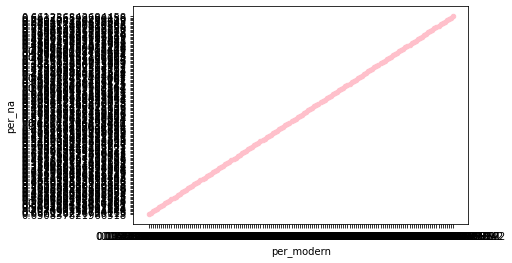

In [17]:
ax1 = df_.plot.scatter(x='per_modern', y='per_na',c='pink')

<AxesSubplot:xlabel='per_modern', ylabel='per_na'>

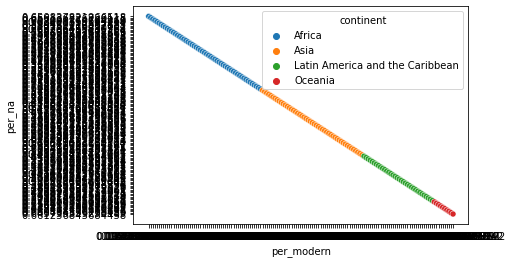

In [18]:
import seaborn as sns
sns.scatterplot(data=df_, x="per_modern", y="per_na", hue = "continent")

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> dtype('<U32')

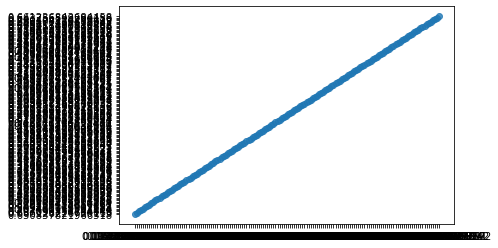

In [19]:
sns.regplot(data=df_, x="per_modern", y="per_na")